In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df1=pd.read_csv("corn_data.csv")

In [3]:
df1.head()

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814


In [4]:
df1.date = pd.to_datetime(df1.date)

In [5]:
df2=pd.read_csv("Weather_Data.csv")

In [6]:
df2.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df= columns_to_drop = ["Date/Time"]
df= df2.drop(columns=columns_to_drop, inplace=True) 


In [8]:
df2.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
df2.shape

(8784, 7)

In [10]:
df=df1.join(df2)

In [11]:
df

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2000-07-17,182.25,182.25,178.25,179.25,19385,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2000-07-18,179.00,183.25,179.00,180.75,25205,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2000-07-19,180.00,182.75,178.75,182.00,17126,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2000-07-20,181.50,187.00,181.00,186.00,18742,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2000-07-21,185.50,188.00,185.00,187.75,16814,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,Rain
5952,2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,Rain
5953,2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,Rain
5954,2024-05-07,457.00,459.50,453.75,453.75,1021,19.1,18.2,95,17,25.0,100.35,Rain


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5956 non-null   datetime64[ns]
 1   open              5956 non-null   float64       
 2   high              5956 non-null   float64       
 3   low               5956 non-null   float64       
 4   close             5956 non-null   float64       
 5   volume            5956 non-null   int64         
 6   Temp_C            5956 non-null   float64       
 7   Dew Point Temp_C  5956 non-null   float64       
 8   Rel Hum_%         5956 non-null   int64         
 9   Wind Speed_km/h   5956 non-null   int64         
 10  Visibility_km     5956 non-null   float64       
 11  Press_kPa         5956 non-null   float64       
 12  Weather           5956 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 605.0+ KB


In [13]:
df = df[df.date >= '2012-01-01'].reset_index(drop=True)
df

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-03,662.00,664.25,653.00,658.50,158650,2.3,-9.7,41,11,25.0,101.55,Clear
1,2012-01-04,658.00,661.75,653.50,658.50,142010,1.9,-9.9,41,9,25.0,101.56,Mostly Cloudy
2,2012-01-05,658.00,659.75,639.50,643.50,184873,0.8,-9.1,47,6,25.0,101.55,Mostly Cloudy
3,2012-01-06,642.00,649.50,640.25,643.50,138311,0.8,-8.8,49,7,25.0,101.52,Cloudy
4,2012-01-09,643.00,663.00,642.75,652.00,178662,1.3,-8.7,47,11,25.0,101.49,Mainly Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,Rain
3099,2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,Rain
3100,2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,Rain
3101,2024-05-07,457.00,459.50,453.75,453.75,1021,19.1,18.2,95,17,25.0,100.35,Rain


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3103 non-null   datetime64[ns]
 1   open              3103 non-null   float64       
 2   high              3103 non-null   float64       
 3   low               3103 non-null   float64       
 4   close             3103 non-null   float64       
 5   volume            3103 non-null   int64         
 6   Temp_C            3103 non-null   float64       
 7   Dew Point Temp_C  3103 non-null   float64       
 8   Rel Hum_%         3103 non-null   int64         
 9   Wind Speed_km/h   3103 non-null   int64         
 10  Visibility_km     3103 non-null   float64       
 11  Press_kPa         3103 non-null   float64       
 12  Weather           3103 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 315.3+ KB


In [15]:
le=LabelEncoder()
df["Weather"] = le.fit_transform(df["Weather"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3103 non-null   datetime64[ns]
 1   open              3103 non-null   float64       
 2   high              3103 non-null   float64       
 3   low               3103 non-null   float64       
 4   close             3103 non-null   float64       
 5   volume            3103 non-null   int64         
 6   Temp_C            3103 non-null   float64       
 7   Dew Point Temp_C  3103 non-null   float64       
 8   Rel Hum_%         3103 non-null   int64         
 9   Wind Speed_km/h   3103 non-null   int64         
 10  Visibility_km     3103 non-null   float64       
 11  Press_kPa         3103 non-null   float64       
 12  Weather           3103 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(3)
memory usage: 303.2 KB


In [17]:
df.set_index('date', inplace=True)

In [18]:
df

,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
date,,,,,,,,,,,,
2012-01-03,662.00,664.25,653.00,658.50,158650,2.3,-9.7,41,11,25.0,101.55,0
2012-01-04,658.00,661.75,653.50,658.50,142010,1.9,-9.9,41,9,25.0,101.56,6
2012-01-05,658.00,659.75,639.50,643.50,184873,0.8,-9.1,47,6,25.0,101.55,6
2012-01-06,642.00,649.50,640.25,643.50,138311,0.8,-8.8,49,7,25.0,101.52,1
2012-01-09,643.00,663.00,642.75,652.00,178662,1.3,-8.7,47,11,25.0,101.49,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,7
2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,7
2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,7


In [19]:
df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [20]:
df.describe()

,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,476.704560,482.032307,471.686996,476.774815,127621.252336,20.139188,12.167999,62.606188,13.195617,31.507541,100.927341,4.058653
std,139.443174,141.810809,137.309693,139.561701,82228.517683,5.471177,5.697682,17.016099,7.049980,12.461907,0.563101,2.638389
min,302.000000,307.250000,300.250000,301.500000,0.000000,-0.700000,-12.000000,18.000000,0.000000,0.400000,99.390000,0.000000
25%,365.500000,368.500000,362.375000,365.250000,81062.500000,16.600000,9.000000,50.000000,8.000000,24.100000,100.560000,1.000000
50%,416.000000,419.750000,410.750000,416.500000,130091.000000,20.600000,12.800000,64.000000,13.000000,25.000000,100.930000,5.000000
75%,599.375000,606.875000,591.250000,599.250000,176743.500000,24.000000,16.700000,75.000000,17.000000,48.300000,101.350000,6.000000
max,830.250000,843.750000,822.750000,831.250000,523849.000000,33.000000,24.400000,99.000000,44.000000,48.300000,102.410000,16.000000


In [21]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


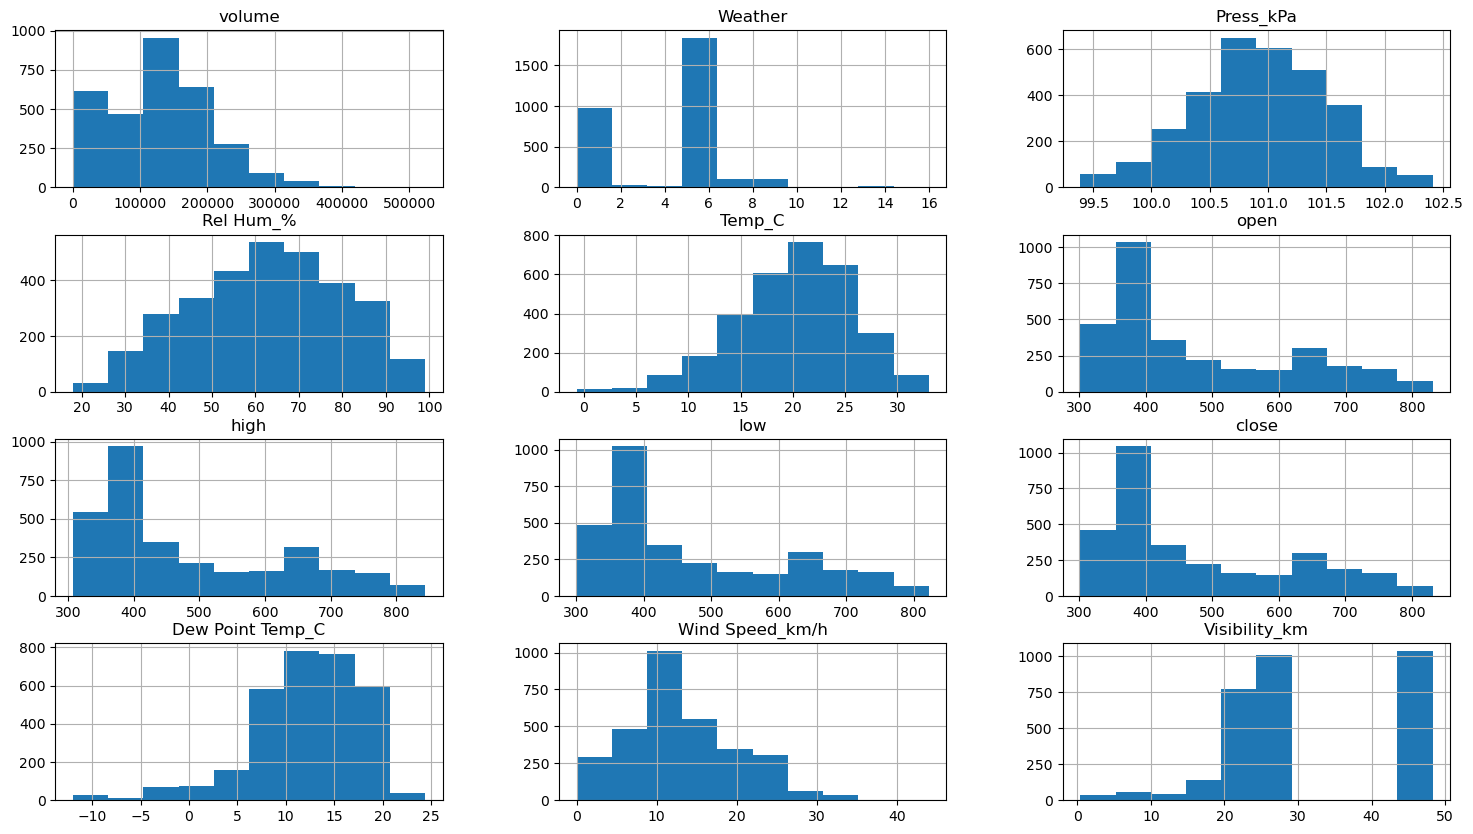

In [22]:
# Plotting histograms of multiple columns together
df.hist(["volume", "Weather", "Press_kPa", "Rel Hum_%", "Temp_C","open","high","low","close","Dew Point Temp_C","Wind Speed_km/h","Visibility_km"], figsize=(18,10));

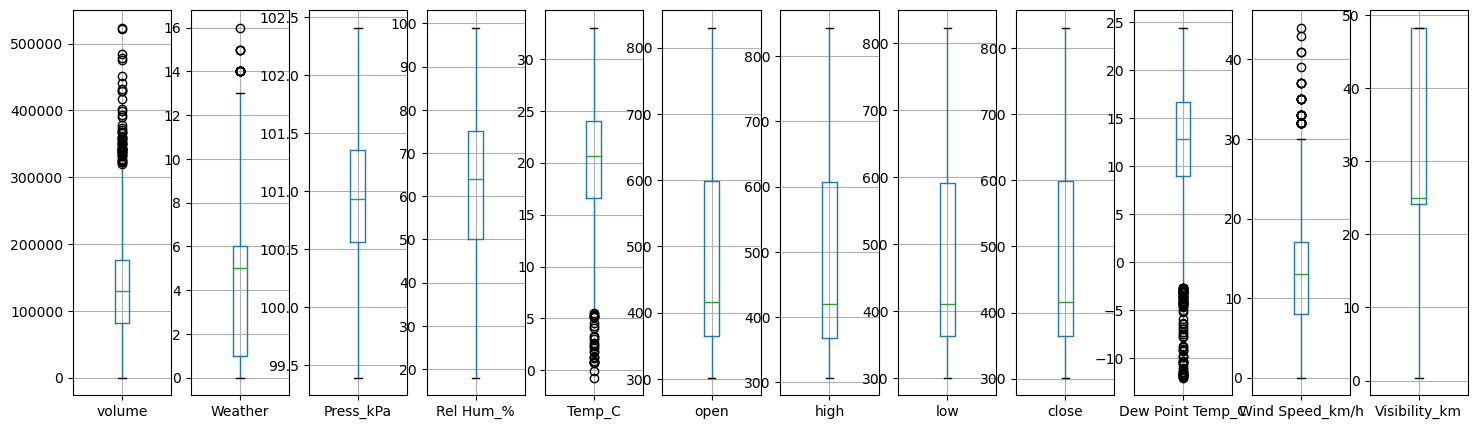

In [23]:
# Box plots for Categorical Target Variable "Clicked" and continuous predictors
ContinuousColsList = ["volume", "Weather", "Press_kPa", "Rel Hum_%", "Temp_C","open","high","low","close","Dew Point Temp_C","Wind Speed_km/h","Visibility_km"]

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [24]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


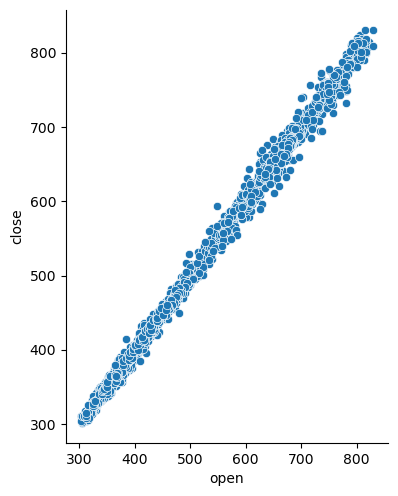

In [25]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['open'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


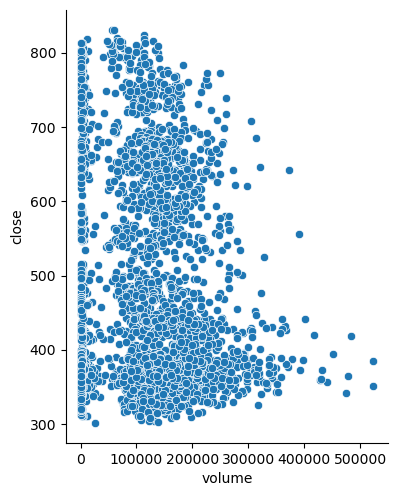

In [26]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['volume'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


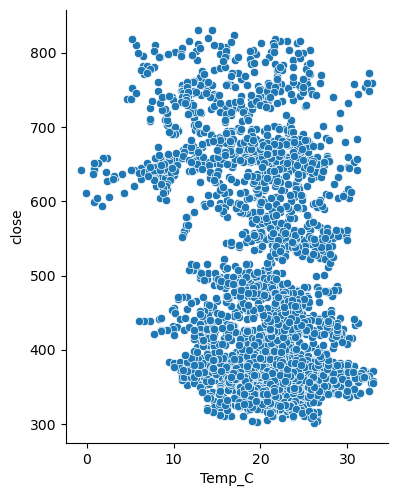

In [27]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Temp_C'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


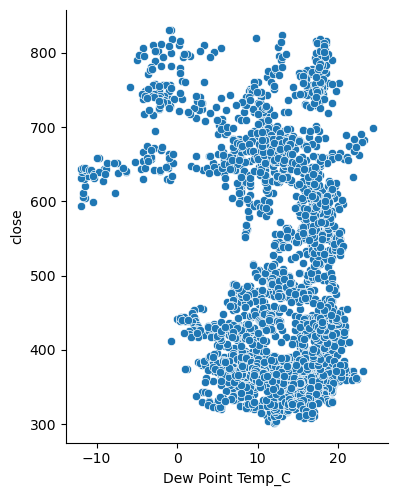

In [28]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Dew Point Temp_C'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


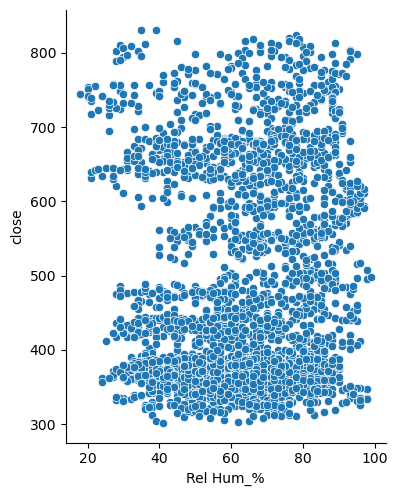

In [29]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Rel Hum_%'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


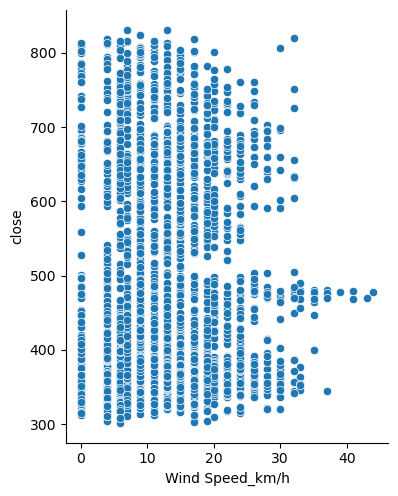

In [30]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Wind Speed_km/h'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


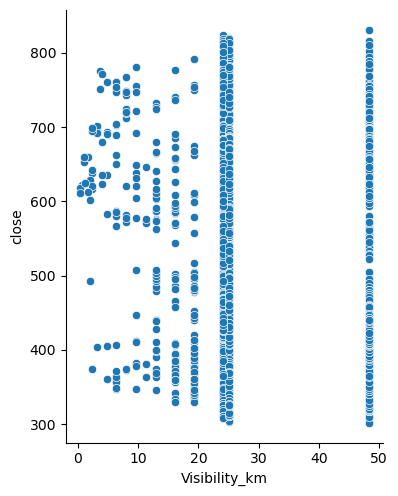

In [31]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Visibility_km'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


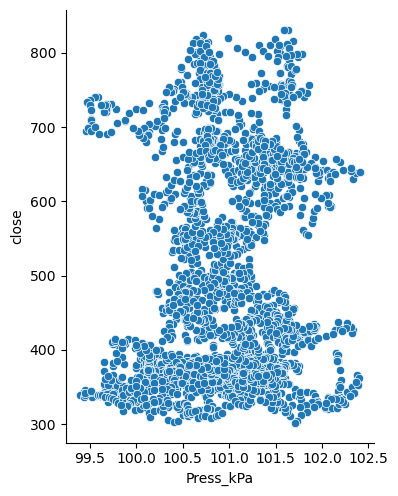

In [32]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Press_kPa'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


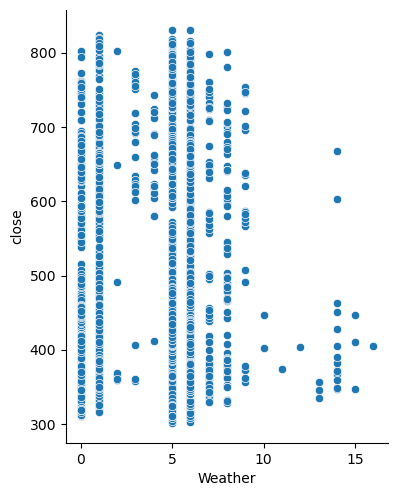

In [33]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Weather'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


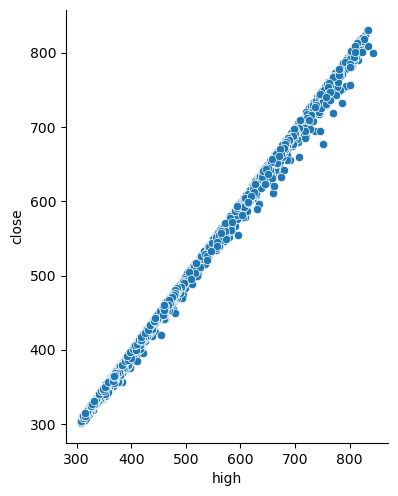

In [34]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['high'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

In [35]:
X = df.drop(columns=['close'])
y = df['close']

In [36]:
from sklearn.preprocessing import Normalizer

# Initialize RobustScaler
scaler = Normalizer()

# Fit scaler to data and transform data
scaled_data = scaler.fit_transform(X)

print("Original Data:")
print(X)
print("\nScaled Data:")
print(scaled_data)


Original Data:
              open    high     low  volume  Temp_C  Dew Point Temp_C  \
date                                                                   
2012-01-03  662.00  664.25  653.00  158650     2.3              -9.7   
2012-01-04  658.00  661.75  653.50  142010     1.9              -9.9   
2012-01-05  658.00  659.75  639.50  184873     0.8              -9.1   
2012-01-06  642.00  649.50  640.25  138311     0.8              -8.8   
2012-01-09  643.00  663.00  642.75  178662     1.3              -8.7   
...            ...     ...     ...     ...     ...               ...   
2024-05-02  442.75  452.25  442.50    2944    20.2              19.2   
2024-05-03  451.25  458.50  446.75    2540    20.3              19.1   
2024-05-06  447.00  458.50  444.50    1907    20.0              18.6   
2024-05-07  457.00  459.50  453.75    1021    19.1              18.2   
2024-05-08  458.50  461.00  457.00   10705    18.6              17.7   

            Rel Hum_%  Wind Speed_km/h  Visibili

In [37]:
splitSize = 0.30
split = round(len(X) * splitSize)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((931, 11), (931,), (2172, 11), (2172,))

In [39]:
model = LinearRegression().fit(X_train, y_train)

In [40]:
print('Training R2 score {} %'.format(round(model.score(X_train, y_train) * 100, 2)))

Training R2 score 99.95 %


In [41]:
print('Test R2 score {} %'.format(round(model.score(X_test, y_test) * 100, 2)))

Test R2 score 99.93 %


In [42]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.95256323 0.99615581 0.97169849 0.9901805  0.99795757 0.9876253
 0.99607252 0.98727736 0.97253611 0.98762892] 
 Mean Accuracy : 0.9839695810448321 
Standard Deviation : 0.013544682282423793


In [43]:
y_pred = model.predict(X_test)

In [44]:
type(y_pred)

numpy.ndarray

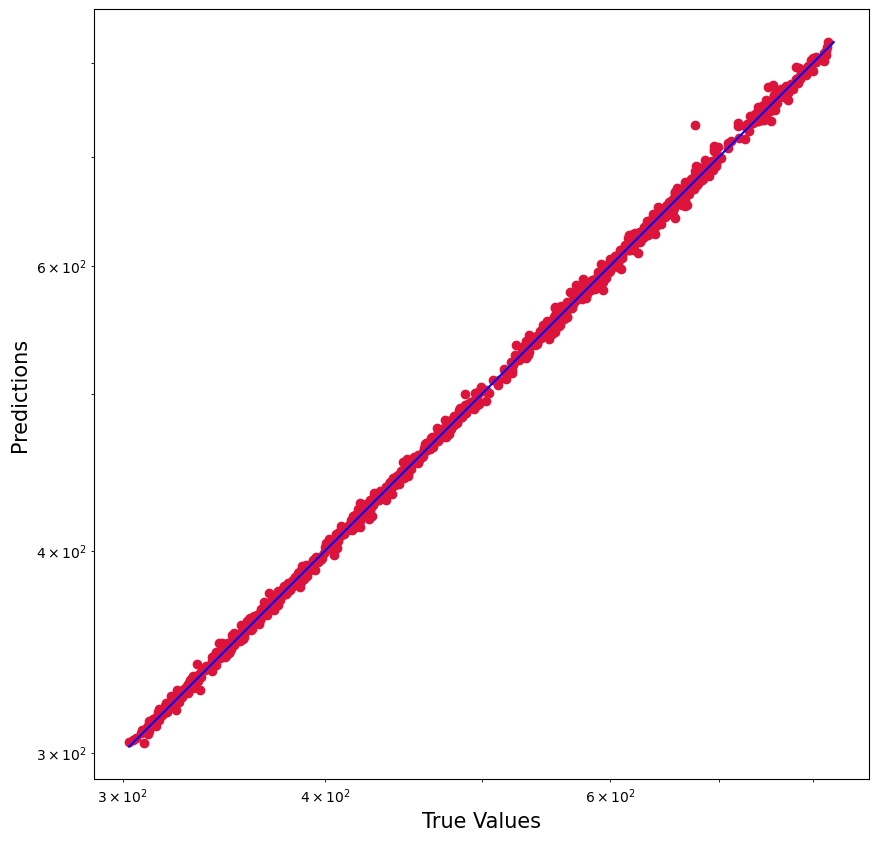

In [45]:
plotSplit = 700
plt.figure(figsize=(10,10))
plt.scatter(y_test[plotSplit:], y_pred[plotSplit:], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[plotSplit:]), max(y_test[plotSplit:]))
p2 = min(min(y_pred[plotSplit:]), min(y_test[plotSplit:]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show();

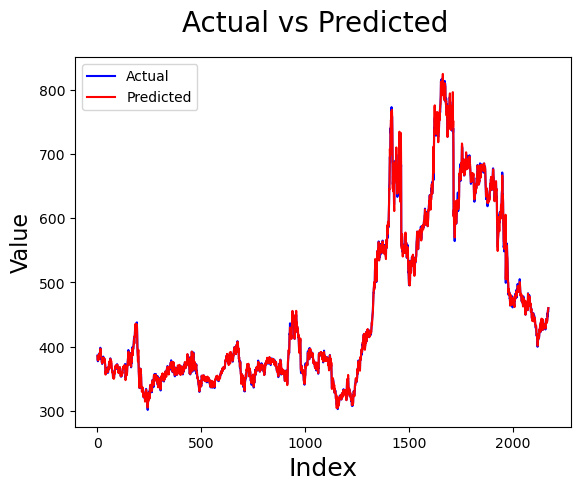

In [46]:
import matplotlib.pyplot as plt

# Generating index
c = [i for i in range(1, 2173, 1)]

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('Value', fontsize=16)  # Y-label
plt.legend(loc='upper left')
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

Text(0.2, 0.85, 'R^2 = 1.00')

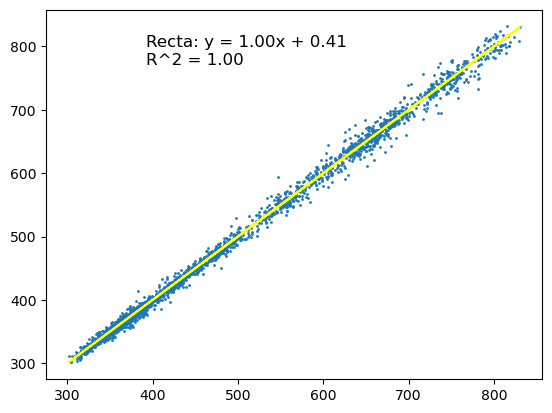

In [48]:
plt.figure(33)
plt.scatter(df['open'],df['close'],s=1)
regression = LinearRegression()
x=df['open']
x=x.values.reshape(-1, 1)
y=df['close']
regression.fit(x,y)
Y_pred = regression.predict(x)
plt.plot(x, Y_pred, label='Línea de regresión', color='yellow')
r2 = r2_score(y, Y_pred)
m = regression.coef_[0]
b = regression.intercept_
ecuacion_recta = f'Recta: y = {m:.2f}x + {b:.2f}'
r2_text = f'R^2 = {r2:.2f}'
plt.text(0.2, 0.9, ecuacion_recta, fontsize=12, transform=plt.gca().transAxes)
plt.text(0.2, 0.85, r2_text, fontsize=12, transform=plt.gca().transAxes)

In [49]:
error = y_test - y_pred

In [50]:
y_test

date
2015-09-16    386.00
2015-09-17    379.75
2015-09-18    377.25
2015-09-21    384.50
2015-09-22    380.50
               ...  
2024-05-02    452.00
2024-05-03    447.00
2024-05-06    457.00
2024-05-07    453.75
2024-05-08    460.00
Name: close, Length: 2172, dtype: float64

In [51]:
y_pred

array([384.99370125, 380.51438689, 379.08862845, ..., 455.08511076,
       456.90219153, 460.00047967])

In [52]:
error

date
2015-09-16    1.006299
2015-09-17   -0.764387
2015-09-18   -1.838628
2015-09-21    1.902936
2015-09-22    1.881839
                ...   
2024-05-02    0.689743
2024-05-03   -7.040900
2024-05-06    1.914889
2024-05-07   -3.152192
2024-05-08   -0.000480
Name: close, Length: 2172, dtype: float64

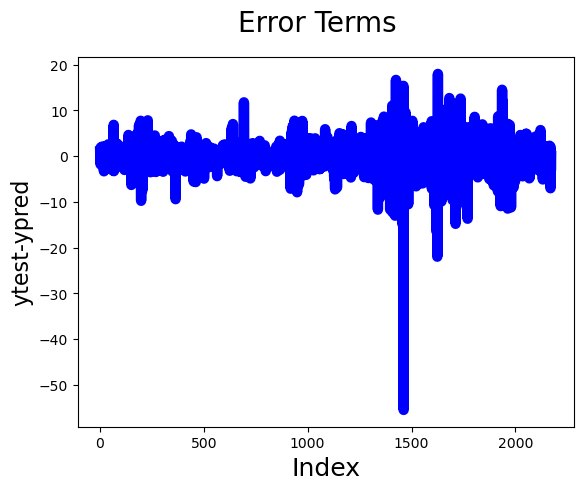

In [53]:
# Error terms
c = [i for i in range(1,2173,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=7.5, linestyle="-");
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16);                # Y-label

In [54]:
mse = mean_squared_error(y_test, y_pred)

In [55]:
r_squared = r2_score(y_test, y_pred)

In [56]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 11.159391512298557
r_square_value : 0.9993345883373796


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn import svm

Better hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}
Mean Squared Error: 25.52833316730397
R-squared: 0.9984777977725702


<Figure size 640x480 with 0 Axes>

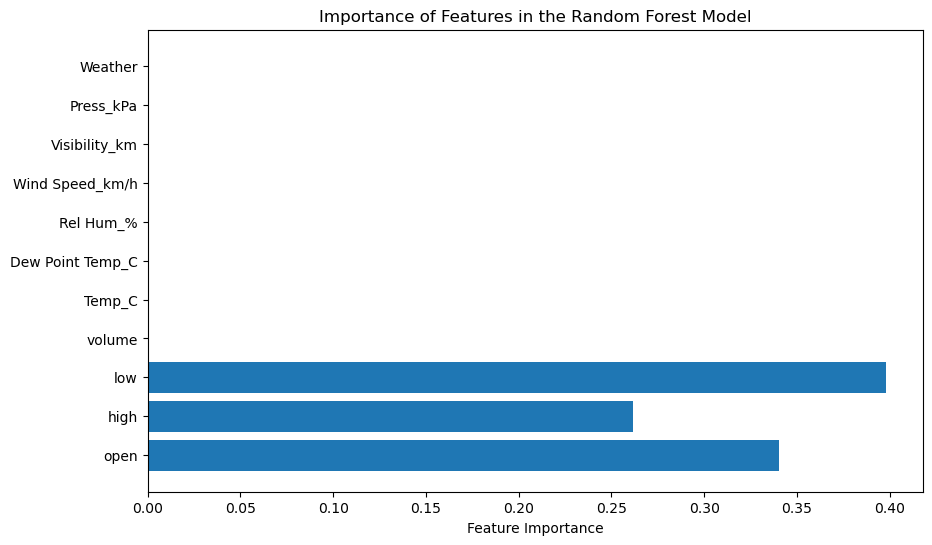

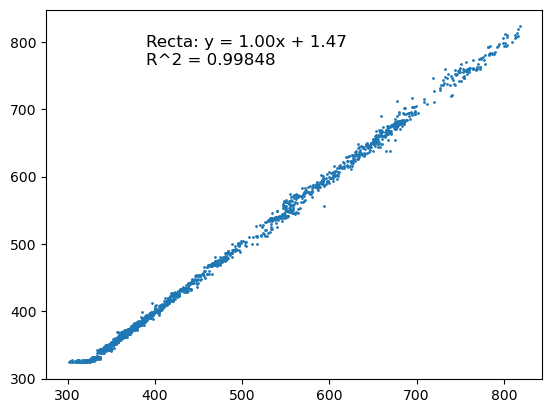

In [58]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [50],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'bootstrap': [True]
}


rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=1, 
    cv=5,         
    random_state=42,
    n_jobs=-1)     


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Better hyperparameters:", best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

feature_importance = best_model.feature_importances_
feature_names = X.columns
plt.figure(42)
plt.figure(figsize=(10, 6));
plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Importance of Features in the Random Forest Model')

plt.figure(41)
y_test2=y_test.values.reshape(-1, 1)
regression.fit(y_test2,y_pred)

plt.scatter(y_test2,y_pred,s=1)
r2 = r2_score(y_test2,y_pred)
m = regression.coef_[0]
b = regression.intercept_
ecuacion_recta = f'Recta: y = {m:.2f}x + {b:.2f}'
r2_text = f'R^2 = {r2:.5f}'
plt.text(0.2, 0.9, ecuacion_recta, fontsize=12, transform=plt.gca().transAxes);
plt.text(0.2, 0.85, r2_text, fontsize=12, transform=plt.gca().transAxes);

In [59]:
Sarima=df1.join(df2)
Sarima = Sarima[Sarima.date >= '2012-01-01'].reset_index(drop=True)
le=LabelEncoder()
Sarima["Weather"] = le.fit_transform(Sarima["Weather"])

<Figure size 1200x500 with 0 Axes>

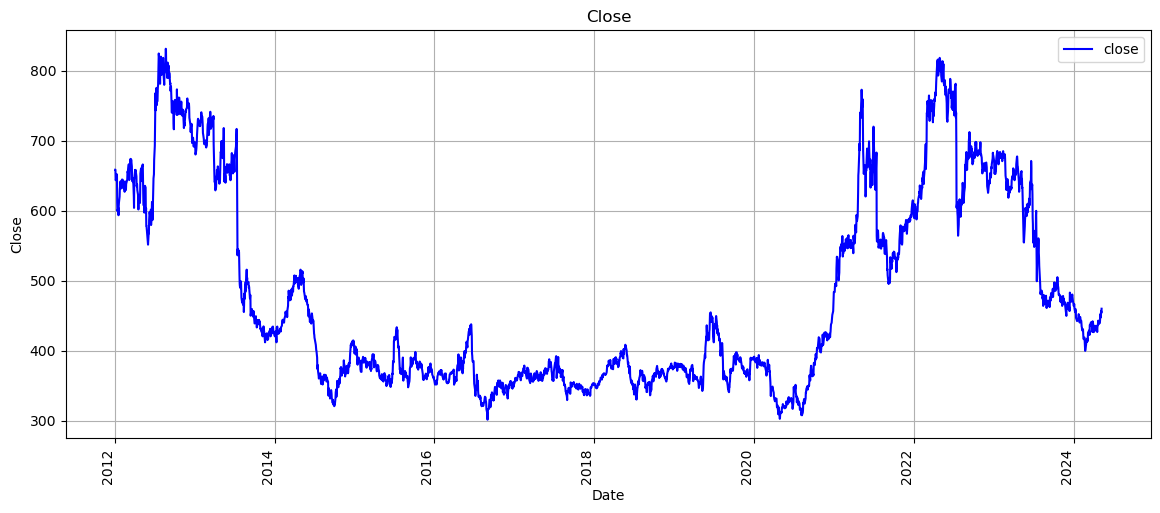

In [60]:
# Visualize close 
plt.figure(figsize=[12, 5]); # Set dimensions for figure
Sarima.plot(x = 'date', y = 'close', figsize = (14, 6), color = 'b')   # 
plt.title('Close')
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show();

In [61]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(Sarima['close'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.9959339450622888
p-value: 0.2883587635240251


In [62]:
Sarima = Sarima
# Ensure 'close' column exists and drop NaN values
if 'close' in df.columns:
    # Calculate daily returns
    Sarima['Returns'] = Sarima['close'].pct_change()

    
# Drop NaN values (due to pct_change and rolling calculation)
Sarima.dropna(inplace=True)

In [80]:
Sarima['Returns'] 

date
2012-01-04    0.000000
2012-01-05   -0.022779
2012-01-06    0.000000
2012-01-09    0.013209
2012-01-10    0.000000
                ...   
2024-05-02    0.019741
2024-05-03   -0.011062
2024-05-06    0.022371
2024-05-07   -0.007112
2024-05-08    0.013774
Name: Returns, Length: 3102, dtype: float64

In [63]:
Sarima = Sarima.drop(['open', 'high', 'low', 'volume','close'], axis=1)

In [81]:
Sarima

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Returns
date,,,,,,,,
2012-01-04,1.9,-9.9,41,9,25.0,101.56,6,0.000000
2012-01-05,0.8,-9.1,47,6,25.0,101.55,6,-0.022779
2012-01-06,0.8,-8.8,49,7,25.0,101.52,1,0.000000
2012-01-09,1.3,-8.7,47,11,25.0,101.49,5,0.013209
2012-01-10,1.3,-7.5,52,11,25.0,101.49,5,0.000000
...,...,...,...,...,...,...,...,...
2024-05-02,20.2,19.2,94,9,19.3,100.47,7,0.019741
2024-05-03,20.3,19.1,93,13,19.3,100.43,7,-0.011062
2024-05-06,20.0,18.6,92,13,16.1,100.35,7,0.022371


In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [65]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(Sarima['Returns'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -28.743916403099803
p-value: 0.0


In [66]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(Sarima['Returns'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, -14331.9493500761], [0, 1, 1, -16471.22945523956], [0, 1, 2, -16467.677410480464], [1, 1, 0, -15176.957544356657], [1, 1, 1, -16469.22950129187], [1, 1, 2, -16468.03433369676], [2, 1, 0, -15600.734446197217], [2, 1, 1, -16468.37646902811], [2, 1, 2, -16465.96086792193], [0, 2, 0, -10944.361207896365], [0, 2, 1, -14315.821905203466], [0, 2, 2, -16298.940504053182], [1, 2, 0, -12663.800605986558], [1, 2, 1, -15159.563673442426], [1, 2, 2, -16435.559294499093], [2, 2, 0, -13671.650126219442], [2, 2, 1, -15582.473499049604], [2, 2, 2, -16380.911921097402]]


In [67]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_variables = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather','Dew Point Temp_C']
exog_data = Sarima[exog_variables]

# Fit SARIMAX model with exogenous variables
best_model = SARIMAX(Sarima['Returns'],exog=exog_data,order=(0, 1, 1), seasonal_order=(0, 1, 1, 5)).fit()

# Display the summary of the model
print(best_model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           Returns   No. Observations:                 3102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 5)   Log Likelihood                7723.364
Date:                           Wed, 06 Nov 2024   AIC                         -15426.728
Time:                                   14:58:51   BIC                         -15366.349
Sample:                                        0   HQIC                        -15405.045
                                          - 3102                                         
Covariance Type:                             opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temp_C              -0.0010      0.001     -1.435      0.151      -0.002       0.000
Rel Hum_%           -0.00

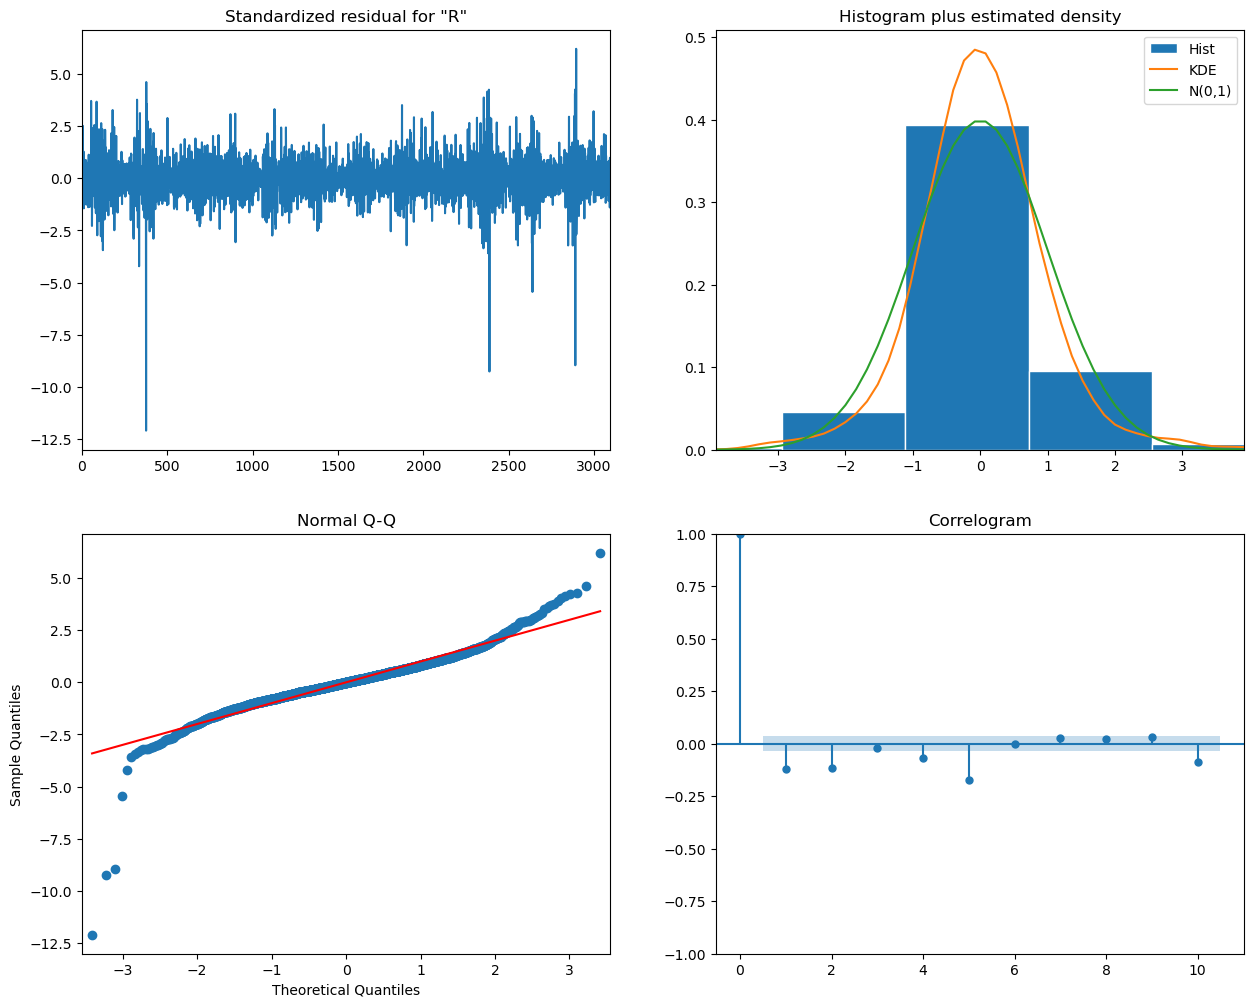

In [68]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

In [69]:
Sarima['date'] = pd.to_datetime(Sarima['date'])  # Convert date column to datetime
Sarima.set_index('date', inplace=True)  # Set date column as index for time series analysis


In [70]:
exog_forecast = exog_data.iloc[:156, :]
# Forecasting for the next 156 steps
forecast_steps = 156
forecast = best_model.get_forecast(steps=forecast_steps, exog=exog_forecast)  # exog variables

# Extract forecast and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


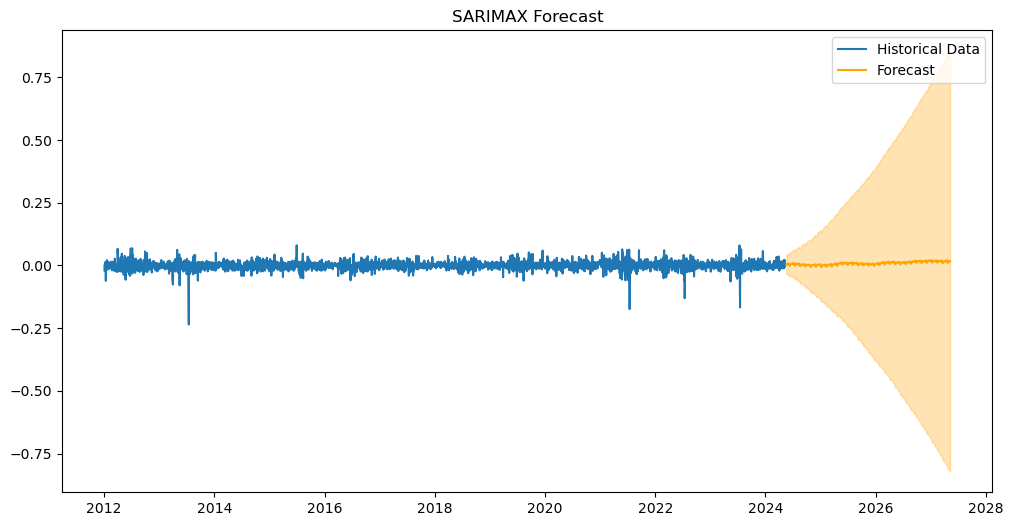

In [71]:
import pandas as pd

# Generate forecast index based on historical data’s last date
last_date = Sarima.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps+1, freq='W')[1:]  # Adjust frequency 

# Assign forecast index to forecast values and confidence intervals
forecast_values.index = forecast_index
confidence_intervals.index = forecast_index

# Now re-plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(Sarima.index, Sarima['Returns'], label='Historical Data')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_values.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()


In [72]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = Sarima[:int(0.90 * (len(Sarima)))]
test  = Sarima[int(0.90 * (len(Sarima))):]
y= Sarima["Returns"]

In [73]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

2792    0.000411
2793    0.003397
2794    0.000830
2795   -0.007672
2796    0.007441
          ...   
3098    0.002466
3099    0.016850
3100    0.002701
3101    0.007059
3102    0.004240
Name: SARIMA Predictions, Length: 311, dtype: float64


In [74]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Returns'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Returns'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Returns'], predictions)

# Display the results
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error
0,-0.486283,0.014938,0.000523


In [75]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit

# Define features and target
data = Sarima.drop(columns=['Returns'])  # Assuming 'Sarima' is the dataset
y = Sarima['Returns']

# Function to create and fit a SARIMA model
def fit_sarima_model(train, order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    return results

# Set up the parameter grid for GridSearchCV
param_grid = {
    'order': [(1, 1, 1), (0, 1, 1), (1, 1, 2)],
    'seasonal_order': [(0, 1, 1, 5), (1, 1, 1, 5)]
}

# Time Series Cross Validation (using TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)

# Prepare a DataFrame to store results
grid_search_results = []

# Iterate over the grid and fit models using cross-validation
for order in param_grid['order']:
    for seasonal_order in param_grid['seasonal_order']:
        fold_results = []
        
        # Perform time series cross-validation
        for train_index, test_index in tscv.split(y):
            train, test = y[train_index], y[test_index]
            
            try:
                # Fit SARIMA model on the current training fold
                model = fit_sarima_model(train, order, seasonal_order)
                
                # Make predictions on the test set
                predictions = model.forecast(steps=len(test))
                
                # Evaluate model
                r2 = r2_score(test, predictions)
                mae = mean_absolute_error(test, predictions)
                mse = mean_squared_error(test, predictions)
                rmse = np.sqrt(mse)
                mape = np.mean(np.abs(predictions - test) / np.abs(test)) * 100

                # Store results for the fold
                fold_results.append({
                    'r2_score': r2,
                    'mean_absolute_error': mae,
                    'mean_squared_error': mse,
                    'rmse': rmse,
                    'mape': mape
                })
            except Exception as e:
                print(f"Error with order: {order}, seasonal_order: {seasonal_order} - {e}")
        
        # Average the results across all folds
        if fold_results:
            avg_results = {key: np.mean([result[key] for result in fold_results]) for key in fold_results[0].keys()}
            avg_results['order'] = order
            avg_results['seasonal_order'] = seasonal_order
            grid_search_results.append(avg_results)

# Create a DataFrame for the grid search results
grid_search_df = pd.DataFrame(grid_search_results)

# Get the best model based on the R² score (or any other metric you prefer)
best_model_row = grid_search_df.loc[grid_search_df['r2_score'].idxmax()]
best_order = best_model_row['order']
best_seasonal_order = best_model_row['seasonal_order']

# Fit the best SARIMA model with the best parameters on the entire training set
train_size = int(len(y) * 0.8)  # 80% for training
train, test = y[:train_size], y[train_size:]
best_model = fit_sarima_model(train, best_order, best_seasonal_order)

# Make predictions using the best model
predictions = best_model.get_forecast(steps=len(test)).predicted_mean.rename('SARIMA Predictions')

# Create a DataFrame to store evaluation metrics
evaluation_results = pd.DataFrame({
    'r2_score': [r2_score(test, predictions)],
    'mean_absolute_error': [mean_absolute_error(test, predictions)],
    'mean_squared_error': [mean_squared_error(test, predictions)],
})

# Display the results
print("Best Model Parameters:")
print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order}")
print("\nEvaluation Results:")
print(evaluation_results)


Best Model Parameters:
Order: (0, 1, 1), Seasonal Order: (0, 1, 1, 5)

Evaluation Results:
   r2_score  mean_absolute_error  mean_squared_error
0 -0.007601             0.012421            0.000337


In [76]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Define features and target
X = Sarima.drop('Returns', axis=1)  
y = Sarima['Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the Random Forest Regressor on the PCA-transformed data
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test_pca)

# Evaluate the model
evaluation_results = pd.DataFrame({
    'r2_score': [r2_score(y_test, y_pred)],
    'mean_absolute_error': [mean_absolute_error(y_test, y_pred)],
    'mean_squared_error': [mean_squared_error(y_test, y_pred)],
    
})

# Display evaluation results
print("Evaluation Results:")
print(evaluation_results)

Evaluation Results:
   r2_score  mean_absolute_error  mean_squared_error
0  -0.11376             0.011635            0.000241


In [77]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Define features and target
X = Sarima.drop('Returns', axis=1) 
y = Sarima['Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up K-Fold Cross-Validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV with KFold as the cross-validation strategy
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='r2', cv=kf, verbose=2, n_jobs=-1)

# Fit GridSearchCV on the PCA-transformed training data
grid_search.fit(X_train_pca, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the best model
evaluation_results = pd.DataFrame({
    'r2_score': [r2_score(y_test, y_pred)],
    'mean_absolute_error': [mean_absolute_error(y_test, y_pred)],
    'mean_squared_error': [mean_squared_error(y_test, y_pred)],
})

# Display evaluation results
print("Evaluation Results:")
print(evaluation_results)

# Print the best parameters found by GridSearchCV
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluation Results:
   r2_score  mean_absolute_error  mean_squared_error
0 -0.022415             0.011173            0.000222
Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [78]:
from sklearn.model_selection import TimeSeriesSplit
tscv= TimeSeriesSplit(n_splits=5)
model6 = RandomizedSearchCV(RandomForestRegressor(),
                      param_grid, cv=tscv).fit(X_train, y_train)
# Make predictions
y_pred = model6.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('mean_absolute_error',mae)

Mean Squared Error: 0.00022069948206788828
R-squared: -0.018706559857884608
mean_absolute_error 0.011223001862450056


In [79]:
# Define features and target
X = Sarima.drop('Returns', axis=1)  
y = Sarima['Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up RandomizedSearchCV with TimeSeriesSplit
model6 = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=tscv,
    scoring='r2',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit the model
model6.fit(X_test_pca, y_test)
y_pred = model6.predict(X_test_pca)  

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('mean_absolute_error',mae)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV:")
print(model6.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Squared Error: 9.306082314219916e-05
R-squared: 0.5704490553739894
mean_absolute_error 0.006920070402864296
Best Parameters from RandomizedSearchCV:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
